# Geothermal Development in the US Basin and Range

### Compiled October 2020 from open data sources

Draft in progress



Data compilation and analysis by Irene Wallis!

In [72]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Installed MWe for each reservoir

Where the installed capacity of a reservoir as reported on a company website or presentation does not match the sum of the plant capacities complied from open data sources (see below), the company data is used. 

In [73]:
#reserviors = pd.read_csv(r'development-byreservoir.csv')
reserviors = pd.read_csv(r'development-byreservoir-trimmed.csv')
# may need to re-include Steamboat in trimmed?
reserviors

,Reservior,State,Installed_MWe,FirstGen
0,Amedee,California,1.600,1988
1,Beowawe,Nevada,19.900,1985
2,Blue Mountain,Nevada,49.500,2009
3,Bradys,Nevada,26.100,1992
4,Cove Fort,Utah,25.000,2013
5,Desert Peak,Nevada,23.000,1985
6,Dixie Valley,Nevada,72.000,1988
7,Don Campbell,Nevada,42.000,2013
8,Florida Canyon,Nevada,0.075,2012
9,Goodsprings,Nevada,7.000,2010


In [74]:
reserviors['Installed_MWe'].describe()

count     30.000000
mean      23.978167
std       28.375155
min        0.040000
25%        3.250000
50%       21.200000
75%       29.025000
max      143.000000
Name: Installed_MWe, dtype: float64

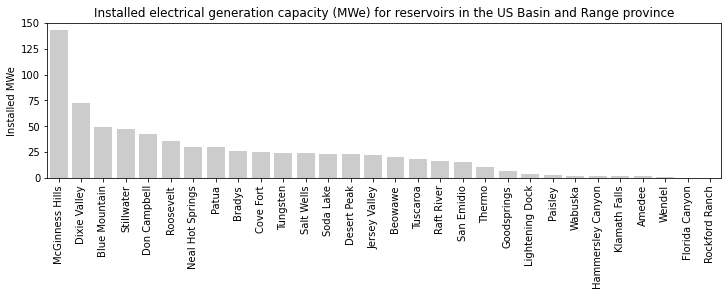

In [75]:
plt.figure(
    figsize=(10,4),
    constrained_layout=True,
)

sortedbymw = reserviors.sort_values(
    by = 'Installed_MWe',
    ascending=False
)

sns.barplot(
    x = 'Reservior',     
    y = 'Installed_MWe', 
    data = sortedbymw,
    color = '#cccccc'
) 

plt.title('Installed electrical generation capacity (MWe) for reservoirs in the US Basin and Range province')

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Installed MWe')

plt.show()

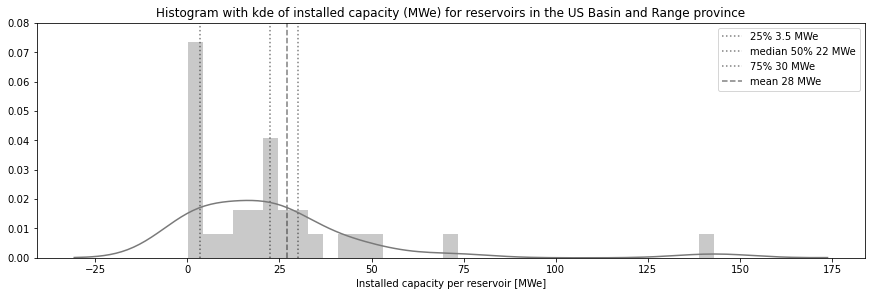

In [76]:
plt.figure(
    figsize=(12,4),
    constrained_layout=True,
)

sns.distplot(
    reserviors.Installed_MWe,
    bins = 35,
    color = '#7a7a7a',
) 

plt.vlines(3.5,0,0.08,linestyle=':',alpha=0.5,label='25% 3.5 MWe')
plt.vlines(22.5,0,0.08,linestyle=':',alpha=0.5,label='median 50% 22 MWe')
plt.vlines(30,0,0.08,linestyle=':',alpha=0.5,label='75% 30 MWe')

plt.vlines(27,0,0.08,linestyle='--',alpha=0.5,label='mean 28 MWe')

plt.title('Histogram with kde of installed capacity (MWe) for reservoirs in the US Basin and Range province')

plt.xlabel('Installed capacity per reservoir [MWe]')

plt.ylim(0,0.08)

plt.legend()

plt.show()

This is biased high because many of these plants do not generate at full installed capacity. 
This distibution is likely driven by econmic power plant size rather than what the reservior will produce. 

We normally expect natral phenomina to be lognormal distibution. The normal distibution with a long and uneven tail to the right indicated that we eaither have several populations or it is undersampled. 

Given the results of resent exploration and development in the Basin and Range, there are likely other hidden systems above the mean. 


Text(0, 0.5, 'Installed MWe')

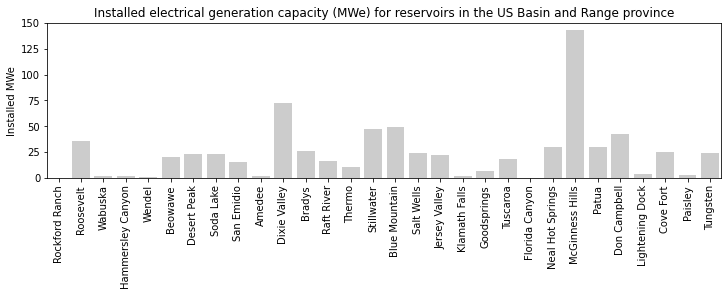

In [83]:
plt.figure(
    figsize=(10,4),
    constrained_layout=True,
)

sortedbymw = reserviors.sort_values(
    by = 'FirstGen',
    ascending=True
)

sns.barplot(
    x = 'Reservior',     
    y = 'Installed_MWe', 
    data = sortedbymw,
    color = '#cccccc'
) 

plt.title('Installed electrical generation capacity (MWe) for reservoirs in the US Basin and Range province')

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Installed MWe')


## Deep circulation systems only

Steamboat Springs, Casa Diablo (has an active volcano - Mammonth Mountain), Coso (not considered Basin and Range), Cove Fort, and Roosevelt are thought to have shallow crustal magmatic sources (Faulds and Hinz, 2015)



# Geothermal power plants 



In [77]:
plants = pd.read_csv(r'development-byplant.csv')
plants

,Reservior,Name,Comissioned,Type,Capacity_Mwe,NetGen_Mwe,Status,Owner
0,Amedee,Amedee,1988,binary,1.60,NaN,NaN,NaN
1,Beowawe,Beowawe,1985,double flash,18.00,NaN,NaN,Beowawe Power LLC
2,Beowawe,Beowawe 2,2011,binary,1.90,NaN,NaN,Terra-Gen Power
3,Blue Mountain,Blue Mountain Faulkner,2009,binary,50.00,NaN,NaN,Altarock
4,Bradys,Brady Hot Springs,1992,double flash,26.10,NaN,NaN,Ormat
5,Coso,Coso Finance Partners Geothermal Plant,1987,flash,90.20,NaN,NaN,NaN
6,Coso,Coso Energy Developers Geothermal Plant,1988,flash,90.00,NaN,NaN,NaN
7,Coso,Coso Power Developers Geothermal Plant,1989,flash,90.00,NaN,NaN,NaN
8,Cove Fort,Cove Fort,2013,binary,25.00,NaN,NaN,ENEL Green Power (Oski Energy phase 2?)
9,Desert Peak,Desert Peak (decommissioned),1985,flash,9.90,NaN,decommissioned 1985,Unknown


In [78]:
plants['Capacity_Mwe'].describe()

count    56.000000
mean     20.288750
std      22.360689
min       0.040000
25%       4.000000
50%      13.200000
75%      26.000000
max      90.200000
Name: Capacity_Mwe, dtype: float64

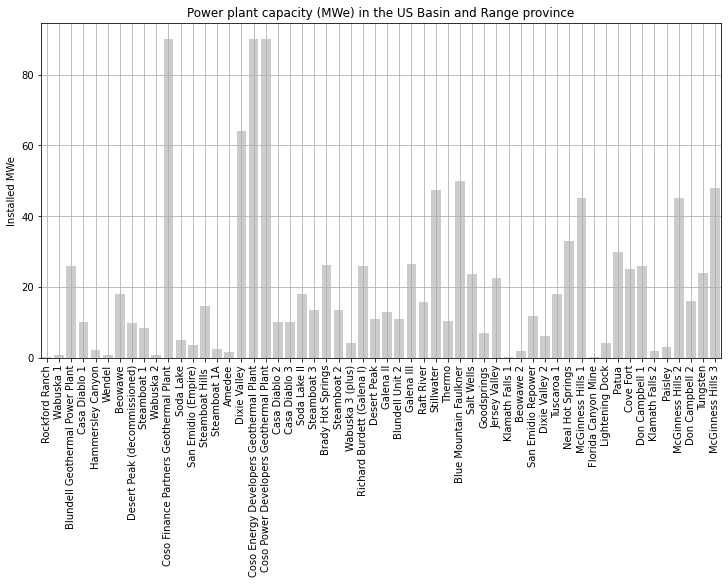

In [85]:
plt.figure(
    figsize=(10,8),
    constrained_layout=True,
)

sortedbymw = plants.sort_values(
    by = 'Comissioned',
    ascending=True
)

sns.barplot(
    x = 'Name',     
    y = 'Capacity_Mwe', 
    data = sortedbymw,
    color = '#cccccc'
) 

plt.title('Power plant capacity (MWe) in the US Basin and Range province')

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Installed MWe')
plt.grid()

plt.show()

In [ ]:
plt.figure(
    figsize=(10,8),
    constrained_layout=True,
)

sortedbymw = plants.sort_values(
    by = 'Capacity_Mwe',
    ascending=False
)

sns.barplot(
    x = 'Name',     
    y = 'Capacity_Mwe', 
    data = sortedbymw,
    color = '#cccccc'
) 

plt.title('Power plant capacity (MWe) in the US Basin and Range province')

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Installed MWe')

plt.show()

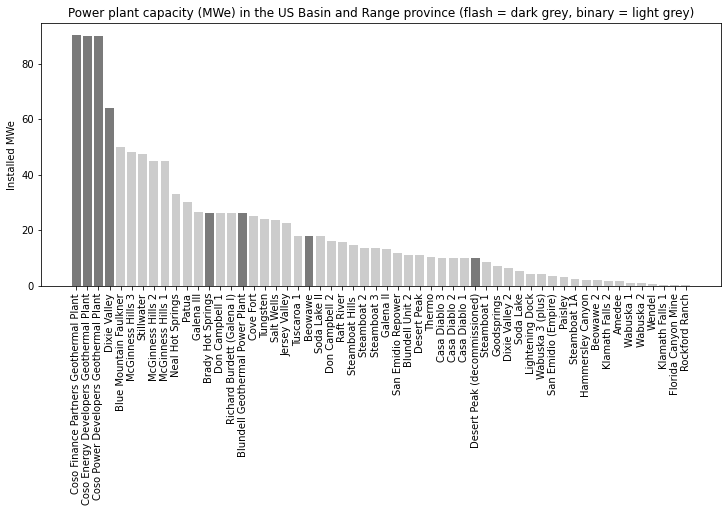

In [80]:
sortedbymw = plants.sort_values(
    by = 'Capacity_Mwe',
    ascending=False
)

x = sortedbymw.Name
y = sortedbymw.Capacity_Mwe

planttype = sortedbymw.Type
col = []
for val in planttype:
    if val == 'binary':
        col.append('#cccccc')
    elif val == 'flash':
        col.append('#7a7a7a')
    else:
        col.append('#7a7a7a')

plt.figure(
    figsize=(10,7),
    constrained_layout=True,
)

plt.bar(x,y, color = col)

plt.title('Power plant capacity (MWe) in the US Basin and Range province (flash = dark grey, binary = light grey)')

plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Installed MWe')

plt.show()

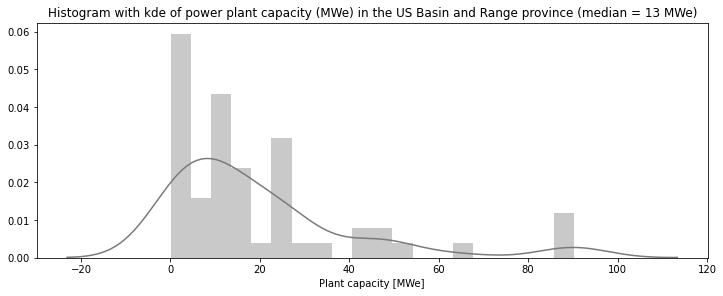

In [81]:
plt.figure(
    figsize=(10,4),
    constrained_layout=True,
)

sns.distplot(
    plants.Capacity_Mwe,
    bins = 20,
    color = '#7a7a7a',
) 

plt.title('Histogram with kde of power plant capacity (MWe) in the US Basin and Range province (median = 13 MWe)')

plt.xlabel('Plant capacity [MWe]')

plt.show()

# Data Sources

TBC